<font size="+3"><b>Assignment 3: Non-Linear Models and Validation Metrics</b></font>

***
* **Full Name** = Aarsh Shah
* **UCID** = 30150079 
***

<font color='Blue'>
In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.
</font>

|                **Question**                | **Point** |
|:------------------------------------------:|:---------:|
|           **Part 1: Regression**           |  **14.5** |
|          Step 0: Import Libraries          |           |
|             Step 1: Data Input             |    0.5    |
|           Step 2: Data Processing          |     0     |
| Step 3: Implement   Machine Learning Model |    0.5    |
|           Step 4: Validate Model           |    0.5    |
|         Step 5: Visualize   Results        |     3     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|         **Part 2: Classification**         |  **17.5** |
|             Step 1: Data Input             |     2     |
|           Step 2: Data Processing          |    1.5    |
| Step 3: Implement   Machine Learning Model |           |
|            Step 4: Validate Mode           |           |
|         Step 5: Visualize   Results        |     4     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|   **Part 3: Observations/Interpretation**  |   **3**   |
|           **Part 4: Reflection**           |   **2**   |
|                  **Total**                 |   **37**  |
|                                            |           |
|                  **Bonus**                 |           |
|         **Part 5: Bonus Question**         |   **3**   |

### Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Part 1: Regression (14.5 marks)**

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

## **Step 1:** Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [9]:
# TO DO: Import concrete dataset from yellowbrick library

from yellowbrick.datasets import load_concrete
X, y = load_concrete(data_home=None, return_dataset=False)


## **Step 2:** Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

<font color='red'>
This is just for your information and no action is required from you for this step.
</font>

## **Step 3:** Implement Machine Learning Model (0.5 marks)

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

## **Step 4:** Validate Model (0.5 marks)

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

## **Step 5:** Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [10]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate

decision_tree_model = DecisionTreeRegressor(max_depth=5, random_state=0)
random_forest_model = RandomForestRegressor(max_depth=5, random_state=0)
gradient_boosting_model = GradientBoostingRegressor(max_depth=5, random_state=0)

# Fit the models
decision_tree_model.fit(X, y)
random_forest_model.fit(X, y)
gradient_boosting_model.fit(X, y)


# Configuartion for K-Fold Cross-Validation
n_folds = 5
cv_config = {'cv': n_folds, 'scoring': 'neg_mean_squared_error', 'return_train_score': True}

# DataFrame to store results
results = pd.DataFrame(columns=['Training Score', 'Validation Score'], index=['DT', 'RF', 'GB'])

# Perform K-Fold CV and evaluate the models
def evaluate_model(model, X, y, cv_config, model_name, pos):
    cv_results = cross_validate(model, X, y, **cv_config)
    
    
    if pos:
        mean_train_score = np.mean(cv_results['train_score'])
        mean_test_score = np.mean(cv_results['test_score'])
    else:
        mean_train_score = np.mean(-cv_results['train_score'])  # Convert from negative MSE to MSE
        mean_test_score = np.mean(-cv_results['test_score'])    # Convert from negative MSE to MSE
        
    results.loc[model_name] = [mean_train_score, mean_test_score]

# Evaluate each model
model_names = ['DT', 'RF', 'GB']
models = [decision_tree_model, random_forest_model, gradient_boosting_model]

for model, name in zip(models, model_names):
    evaluate_model(model, X, y, cv_config, name, False)

# Print the results DataFrame
results

,Training Score,Validation Score
DT,47.918561,163.087775
RF,32.055432,156.404972
GB,3.73927,99.360259


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`.

<font color='red'>
Due to the similarity of this to the main part of step 5, this part is 0.5 and the main part of step 5 is 2.5 of the total 3 points for this step.
</font>

In [11]:
# TO DO: ADD YOUR CODE HERE
# This would be similar to the main step, the main difference is the scoring.
results = pd.DataFrame(columns=['Training Score', 'Validation Score'], index=['DT', 'RF', 'GB'])
cv_config = {'cv': n_folds, 'scoring': 'r2', 'return_train_score': True}

for model, name in zip(models, model_names):
    evaluate_model(model, X, y, cv_config, name, True)

# Print the results DataFrame with R^2 scores
results

,Training Score,Validation Score
DT,0.822887,0.17621
RF,0.881221,0.173748
GB,0.986436,0.473701


## Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

<font color='Green'><b>YOUR ANSWERS HERE</b></font>

1. Comparing the mean squared error scores for the Decision Tree, Random Forest, and Gradient Booster it is clear that in general, their training scores were exceptionally better than the linear models from the previous assignment (especially the gradient booster). In this case, the Training MSE Scores were 47.9, 32.1, and 3.7 respectively compared to the 111.4 for the linear model. Thus in the best case, the Gradient booster was over 30x better than the linear model, which as described in the previous assignment is considerably good considering the y data is between 30-80, thus in the worst case (for the gradient booster) it only deviated by about 10%. However when we start to look at the MSE for the validation scores it's clear the models don't perform quite as well under the test data, and this is a clear indicator of an overfit model that is trained too closely to the training data. To compare the data (163.1, 156.4, 99.4 vs 95.9 for the linear model), all 3 of the validation scores from this assignment are higher than that of the last assignment, thus indicating major deviation from the expected results. This is a very similar case when we look at the R2 Score metrics. The training scores are very high (0.82, 0.88, and 0.98 vs 0.61) but as soon as the test data is used the validation scores drop to 0.18, 0.17, 0.47 compared to 0.62.


2. In general, I definitely choose the Linear Regression model because looking solely at the metrics and reasons listed above it seems as if it performs vastly better at predicting the y-values. It is also important to note that I tested different hyperparameters and in general, found that the linear model still performed better. 


3. 
    - Hyperparameter Tuning: Adjust the hyperparameters of the tree-based models to find a better balance between bias and variance. For Decision Trees, you could experiment with max_depth, min_samples_split, and min_samples_leaf to prevent overfitting. For Random Forests, in addition to the Decision Tree parameters, you can adjust n_estimators (the number of trees in the forest) and max_features (the number of features to consider when looking for the best split). For Gradient Boosting, parameters like learning_rate, n_estimators, and subsample can significantly impact performance.
    - Feature Engineering: Improving or adding new features can significantly increase the predictive power of your model. This could involve creating interaction terms between features, applying transformations (logarithmic, square root, etc.) to certain features to normalize their distribution, or even generating new features that capture more complexity in the data. Additionally, feature selection methods can be applied to remove irrelevant or redundant features from the dataset, which can help in reducing the complexity of the model and improving its generalization capability.


## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>

I sourced all of the code from the sklearn (e.g. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), pandas docs, Github Co-pilot and from the last assignment (1). When I used Co-pilot it initially generated code that was incorrect because it was attempting to train and fit the data before the cross-validation function. I was skeptical about this, and thus referenced the docs and found that the cross_validation function already handles all of that for us, thus I removed those unnecessary steps. I also used ChatGPT to help me interpret the results and understand how the models could be improved, and why specifically they weren’t performing as well as I had expected.

I completed the steps in order on a basic level and then followed the suggestion of using a loop by going back and creating a reusable function called the evaluate model that allows for the passing of all the configurations.

Most of my challenges regarding this section had to do with understanding what cross-validation was, I was successful by going back and reading through the lecture slides from the start of the semester as well as reading through the docs mentioned above to fully understand the purpose of the function.

# **Part 2: Classification (17.5 marks)**

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

## **Step 1:** Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [12]:
# TO DO: Import wine dataset
## **Step 1:** Data Input (2 marks)

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X_wine = wine.data.features 
y_wine = wine.data.targets 

# X represents the feature matrix and y represents the target vector
print(X_wine.shape, type(X_wine))
print(y_wine.shape, type(y_wine))

(178, 13) <class 'pandas.core.frame.DataFrame'>
(178, 1) <class 'pandas.core.frame.DataFrame'>


## **Step 2:** Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [13]:
# TO DO: ADD YOUR CODE HERE
X_wine.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
y_wine.head()

,class
0,1
1,1
2,1
3,1
4,1


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [15]:
# TO DO: ADD YOUR CODE HERE
if (y_wine.isnull().values.any() == True):
    print("There are missing values in the target vector, fill them with the mean value")
    y_wine.fillna(y.mean(), inplace=True)
    
if (X_wine.isnull().values.any() == True):
    print("There are missing values in the feature matrix, fill them with the mean value")
    X_wine.fillna(X.mean(), inplace=True)

How many samples do we have of each type of wine?

In [16]:
# TO DO: ADD YOUR CODE HERE
print(y_wine.value_counts())

class
2        71
1        59
3        48
dtype: int64


## **Step 3:** Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

## **Step 4:** Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

## **Step 5:** Visualize Results (4 marks)

<font color='red'>
There is no individual mark for Steps 3 and 4 and those grades are included within the four points.

</font>

### **Step 5.1:** Compare Models (2 out of total 4 marks)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [17]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.metrics import confusion_matrix


svc_model = SVC(random_state=0)
decision_tree_model = DecisionTreeClassifier(max_depth=3, random_state=0)

svc_model.fit(X_wine, y_wine)
decision_tree_model.fit(X_wine, y_wine)


results = pd.DataFrame(columns=['Training Score', 'Validation Score'],  index=['SVC', 'DT'])
cv_config = { 'scoring': 'accuracy', 'return_train_score': True}
models = [svc_model, decision_tree_model]
model_names = ['SVC', 'DT']


for model, name in zip(models, model_names):
    evaluate_model(model, X_wine, y_wine, cv_config, name, True)

# Print the results DataFrame with R^2 scores
print(results)

c:\Users\aarsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aarsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aarsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aarsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataC

    Training Score Validation Score
SVC       0.703743         0.663492
DT        0.974756         0.893175


### **Step 5.2:** Visualize Classification Errors  (2 out of total 4 marks)
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [18]:
# TO DO: Implement best model
decision_tree_model = DecisionTreeClassifier(max_depth=3, random_state=0)
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, random_state=0)
decision_tree_model.fit(X_wine_train, y_wine_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

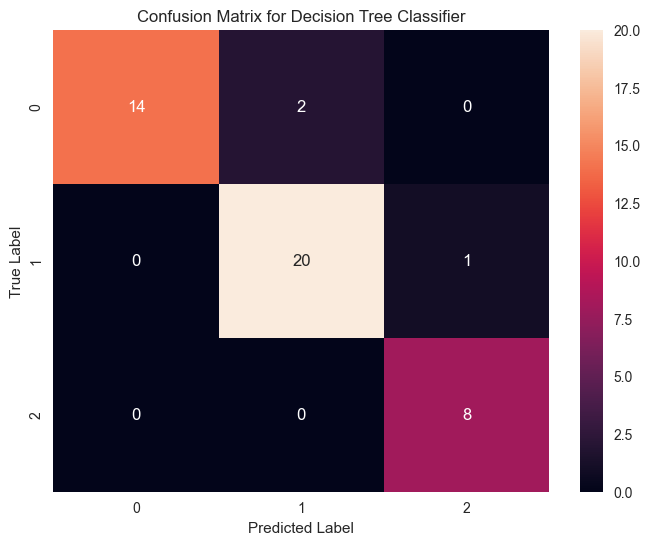

In [19]:
# TO DO: Print confusion matrix using a heatmap
# Predictions
y_wine_pred = decision_tree_model.predict(X_wine_test)

# Generate confusion matrix
cm = confusion_matrix(y_wine_test, y_wine_pred)
    
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [20]:
# TO DO: Print classification report

from sklearn.metrics import classification_report

report = classification_report(y_wine_test, y_wine_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.91      0.95      0.93        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



## Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2?
1. In this case, is maximizing precision or recall more important? Why?


<font color='Green'><b>YOUR ANSWERS HERE</b></font>

1. The difference between the training and validation accuracy is drastic. The decision tree classifier performs much better in both the training and test set with SVC performing at 0.70 and 0.66 vs DT at 0.97 and 0.89 respectively. This means that the Descison tree has almost no deviations from its expected results on its training set but is also predicted very well on new data. The DT performed 23% better on the test set. This is a reflection of clear overfitting on both cases, but especially DT due to the large difference.

2. Two reasons as to why the SVM didn't work as well as the the tree-based model include:
    - SVMs are sensitive to the feature space and scale, especially in cases where the feature dimensions have different scales or the data is not linearly separable. The effectiveness of SVM is largely dependent on the tuning of its hyperparameters, and the scaling of input features. If these aspects are not optimally configured, SVM might not capture the complexity of the specific distributions of the data as effectively as tree-based models, which inherently handle varying feature scales and non-linear separability by partitioning the data space into simpler regions. Thus if we were instructed to use more specific parameters it may have performed better.
    - Generalization of SVC: SVC aims to find a decision boundary with the maximum margin, which can help in better generalization to unseen data. However, if the SVC model is too simple, or if the hyperparameters are not optimally tuned, it might not capture the underlying data structure well, leading to underfitting. This underfitting results in poorer performance on both training and validation datasets compared to a model that captures the data's complexity more accurately, like a Decision Tree in this scenario.
    

3. 2 samples were labeled as 1 but should have been 0, and 1 sample was labeled as 1 but should have been 2. Thus 3 samples were incorrectly labeled in total.

4. In this context maximizing one over the other comes down to these factors:

    - If maximizing precision: You're aiming to ensure that when a wine is classified as belonging to a certain cultivar, it is very likely correct. This could be important in contexts where misclassification could lead to significant economic loss or damage to reputation, such as in the marketing of high-end wines where customers expect a certain quality and origin.

    - If maximizing recall: You're aiming to ensure that as many wines of a specific cultivar are correctly identified as possible. This could be important in scenarios where missing a wine of a particular cultivar is costly, such as in scientific research where accurately identifying the diversity and characteristics of wines from different cultivars is crucial.

In this case, it is likely better to <b>maximize for recall</b> because the dataset doesn't include the same amount for each class (particularly, 59 for 1, 71 for 2, and 48 for 3) thus we want the minority classes to be correctly classified as much as possible. 


## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>

Similar to the first part, I used a combination of resources. For this one specifically, I primarily used the sklearn Decision Tree Classifier and SVC  class documentation, as well as the code from the previous part and previous labs. I also used ChatGPT to generate the code, especially around the confusion matrix. For the generative AI portion of my code, my prompts were quite basic, they followed the instructions pretty closely, but I had to describe to it the purpose of certain things for the AI to understand. I completed the steps pretty much in order but I found it helpful to go to the first section actually and compare and contrast what was being done there and then update the evaluate_model function I had made slightly so that I could reuse it with these new models.

Most of the challenges surrounding the second part came from interpreting what it meant to have high precision and recall, and the combination of those values can maximize a certain desired outcome. In addition, I also found it a little challenging to understand how to read the confusion matrix for a non-binary problem. I used research, notes, and ChatGPT to help me understand how to properly interpret the results.


# **Part 3: Observations/Interpretation (3 marks)**

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

<font color='Green'><b>
ADD YOUR FINDINGS HERE
</b></font>

One of the key topics we've discussed in lectures and classes is the sensitivity of Machine Learning models to certain conditions for optimal performance. This includes the necessity of clean data, properly set hyperparameters, and the importance of trial and error to achieve the most ideal results. This assignment has reinforced this concept. The approach involves understanding the dataset and precisely identifying what we aim to predict. Then, by applying different models to the dataset and employing complex metrics and cross-validation, we determine which model performs best under specific parameters, ultimately selecting the most suitable one. Over time, and even within this assignment, it's expected that data scientists will develop a clearer intuition about which approaches are more likely to succeed.

In the first part, there was a clear demonstration of the lesson that a model's performance on training data doesn't necessarily predict its success on test data, highlighting the significance of being mindful of underfitting and overfitting. For instance, the gradient booster exhibited a nearly perfect R2 score at 98.6% on training data, but its accuracy on test data dramatically fell to 47.4%, indicating overfitting and a failure to generalize to unseen data. We used 4 different models and compared and contrasted many metrics to understand which model would work better. Concluding that the Linear Regression from assignment 1 was much better considering its validation accuracy was 62% compared to the Decision Trees 18%, the Random Forests 17% and the Gradient Boosteds 47%. Thus it's important to test multiple different methods to get the most ideal results.

The second part was also a testament to the pattern explained above. We used three different methods on the wine dataset: SVC, Decision Tree, and LinearSVC, and saw that each model performed incrementally better, with SVC there was a test accuracy of 66%, then DT with 89%, and finally with LSVC with 92%. Additionally, this was a practical application of the metrics we've learned in class. A high precision score signifies that the model is highly accurate in its positive predictions, indicating a high likelihood of correctness when it predicts a positive class. Conversely, a high recall score suggests that the model is effective at identifying positive instances, capturing a significant portion of the actual positives.

It is also important to notice that as seen above without propely configuration you will overfit your data.


## **Part 4:** Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

<font color='Green'><b>
ADD YOUR THOUGHTS HERE
</b></font>

In this assignment, comparing the different models was quite enlightening. It helped me see why certain models work better for specific tasks by putting their performances next to each other. This comparison made it easier to understand the strengths and weaknesses of each model in a more practical context, rather than just looking at numbers without comparison. However, I found the concepts of precision and recall more challenging because they involve understanding the trade-off between correctly identifying true positives and avoiding false positives. This balance is not always straightforward and requires a deeper look into how the models make their predictions, which can be complex to grasp fully.

## **Part 5:** Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

c:\Users\aarsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aarsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\aarsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\aarsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

     Training Score Validation Score
SVC        0.703743         0.663492
DT         0.974756         0.893175
LSVC       0.880725         0.921746


c:\Users\aarsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


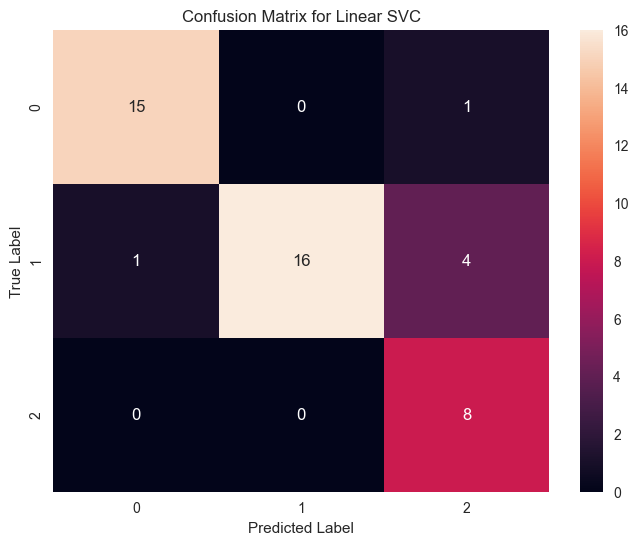

              precision    recall  f1-score   support

           1       0.94      0.94      0.94        16
           2       1.00      0.76      0.86        21
           3       0.62      1.00      0.76         8

    accuracy                           0.87        45
   macro avg       0.85      0.90      0.85        45
weighted avg       0.91      0.87      0.87        45



In [21]:
# TO DO: ADD YOUR CODE HERE
from sklearn.svm import LinearSVC

svc_model = LinearSVC(random_state=0, max_iter=5000)    
svc_model.fit(X_wine, y_wine)
evaluate_model(svc_model, X_wine, y_wine, cv_config, "LSVC", True)

# Print the results DataFrame with R^2 scores
print(results)


svc_model = LinearSVC(random_state=0, max_iter=5000)    
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, random_state=0)
svc_model.fit(X_wine_train, y_wine_train)

y_wine_pred = svc_model.predict(X_wine_test)

# Generate confusion matrix
cm = confusion_matrix(y_wine_test, y_wine_pred)
    
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Linear SVC')
plt.show()

report = classification_report(y_wine_test, y_wine_pred)
print(report)

*ANSWER HERE*

The LinearSVC actually makes a very good fit for this dataset. Solely comparing the numbers, the training accuracy is 88.1% which is quite good, but it actually out performs the SVC and DT for the validation score (which is what we truly care about) with a score of 92.1% compared to 66% and 89% respectively. In addition looking at the confusion matrix its clear that the middle diagonal is populated the most and just barely under peforms compared to the DT with (15, 16, 8 for the LinearSVC and 14, 20, 8 with DT).